In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [2]:
# Load all dataset
kcsales = pd.read_csv('kc_house_data.csv')
# Load the traiing dataset
kcsales_train = pd.read_csv('kc_house_train_data.csv')
# Load the test dataset
kcsales_test = pd.read_csv('kc_house_test_data.csv')

In [3]:
kcsales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Now we will write a function that will accept an DataFrame, a list of feature names (e.g. ['sqft_living', 'bedrooms'])
#and an target feature e.g. ('price') and will return two things:
#A numpy matrix whose columns are the desired features plus a constant column (this is how we create an 'intercept')
#A numpy array containing the values of the output
def get_numpy_data(df, features, output):
    df['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of DataFrame given by the features list into the DataFrame features_df (now including constant):
    features_df = df[features]
    # the following line will convert the features_df into a numpy matrix:
    feature_matrix = features_df.values
    # assign the column of data frame associated with the output to the SArray output_sarray
    output_sarray = df[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.values
    return(feature_matrix, output_array)

In [6]:
#For testing - use the 'sqft_living' feature and a constant as our features and price as our output:
(example_features, example_output) = get_numpy_data(kcsales, ['sqft_living'], 'price') # the [] around 'sqft_living' makes it a list
print (example_features[0,:]) # this accesses the first row of the data the ':' indicates 'all columns'
print (example_output[0]) # and the corresponding output

[   1 1180]
221900.0


In [7]:
example_output

array([ 221900.,  538000.,  180000., ...,  402101.,  400000.,  325000.])

In [9]:
#Suppose we had the weights [1.0, 1.0] and the features [1.0, 1180.0]
#and we wanted to compute the predicted output 1.0*1.0 + 1.0*1180.0 = 1181.0
my_weights = np.array([1., 1.]) # the example weights
my_features = example_features[0,] # we'll use the first data point
predicted_value = np.dot(my_features, my_weights)
print (predicted_value)

1181.0


In [11]:
#A function to predict output given regression weights
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [12]:
#To test my code
test_predictions = predict_output(example_features, my_weights)
print (test_predictions[0]) # should be 1181.0
print (test_predictions[1]) # should be 2571.0

1181.0
2571.0


# Computing the Derivative

We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

(w[0]\*[CONSTANT] + w[1]\*[feature_1] + ... + w[i] \*[feature_i] + ... +  w[k]\*[feature_k] - output)^2

Where we have k features and a constant. So the derivative with respect to weight w[i] by the chain rule is:

2\*(w[0]\*[CONSTANT] + w[1]\*[feature_1] + ... + w[i] \*[feature_i] + ... +  w[k]\*[feature_k] - output)\* [feature_i]

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

2\*error\*[feature_i]

That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors. 

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).

In [13]:
#A functin to calculate derivative
def feature_derivative(errors, feature):
    # Assume that errors and feature are both numpy arrays of the same length (number of data points)
    # compute twice the dot product of these vectors as 'derivative' and return the value
    derivative = 2*np.dot(errors,feature)
    return(derivative)

In [14]:
#To test my feature derivartive run the following:
(example_features, example_output) = get_numpy_data(kcsales, ['sqft_living'], 'price') 
my_weights = np.array([0., 0.]) # this makes all the predictions 0
test_predictions = predict_output(example_features, my_weights) 
# just like SFrames 2 numpy arrays can be elementwise subtracted with '-': 
errors = test_predictions - example_output # prediction errors in this case is just the -example_output
feature = example_features[:,0] # let's compute the derivative with respect to 'constant', the ":" indicates "all rows"
derivative = feature_derivative(errors, feature)
print (derivative)
print (-np.sum(example_output)*2) # should be the same as derivative

-23345850016.0
-23345850016.0


In [28]:
errors

array([-221900., -538000., -180000., ..., -402101., -400000., -325000.])

In [16]:
from math import sqrt # recall that the magnitude/length of a vector [g[0], g[1], g[2]] is sqrt(g[0]^2 + g[1]^2 + g[2]^2)

In [23]:
# A Gradient descent function using derivative function above
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)
            gradient_sum_squares = (derivative * derivative) + gradient_sum_squares
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size*derivative
        # compute the square-root of the gradient sum of squares to get the gradient magnitude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

In [24]:
# let's test out the gradient descent
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(kcsales_train, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

In [25]:
# Next run gradient descent with the above parameters.
#Quiz Question: What is the value of the weight for sqft_living -- the second element of ‘simple_weights’ (rounded to 1 decimal place)?
regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

array([-46999.88716555,    281.91211918])

In [33]:
#Quiz Question: What is the predicted price for the 1st house in the TEST data set for model 1 (round to nearest dollar)?
from babel.numbers import format_currency
(test_simple_feature_matrix, test_output) = get_numpy_data(kcsales_test, simple_features, my_output)
my_predictions = predict_output(test_simple_feature_matrix, np.asarray([-46999.88716555,281.91211918]))
print ('Prediction house price for 1st house in the TEST data: ' + format_currency(my_predictions[0], 'USD', locale='en_US'))

Prediction house price for 1st house in the TEST data: $356,134.44


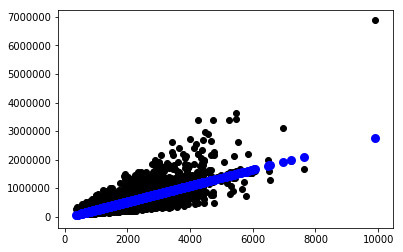

In [34]:
# Plot outputs
plt.scatter(kcsales_test['sqft_living'], kcsales_test['price'],  color='black')
plt.scatter(kcsales_test['sqft_living'], my_predictions, color='blue', linewidth=3)
plt.show()
plt.close()

In [36]:
# Calculate RSS
output = kcsales_test['price']
residuals = my_predictions - output
RSS1 = (residuals * residuals).sum()
print (RSS1)

275400044902035.0


In [44]:
#Use built in linear regression to calculate the weights and the RSS
regr = linear_model.LinearRegression()
regr.fit(kcsales_train['sqft_living'].reshape(-1,1), kcsales_train['price'])


/Users/yunpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
#Print weight
Sci_predictions = regr.predict(kcsales_test['sqft_living'].reshape(-1,1))
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 281.95883963]


/Users/yunpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [49]:
#Print intercept
print('intercept: \n', regr.intercept_)

intercept: 
 -47116.0790729


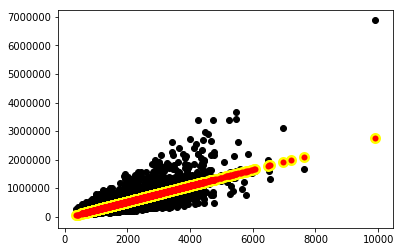

In [58]:
# Plot outputs of two predictions along with orginal data set
plt.scatter(kcsales_test['sqft_living'], kcsales_test['price'],  color='black')
plt.scatter(kcsales_test['sqft_living'], my_predictions, color='yellow', linewidth=5)
plt.scatter(kcsales_test['sqft_living'], Sci_predictions, color='red', linewidth=0.02)
plt.show()
plt.close()

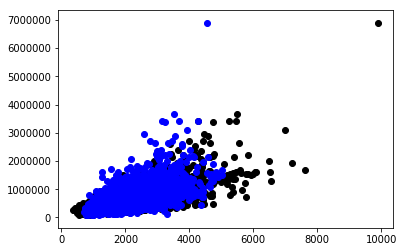

In [60]:
#Running a multiple regression
#Plot stft_living and sqft_living15 in the same plot
plt.scatter(kcsales_test['sqft_living'], kcsales_test['price'],  color='black')
plt.scatter(kcsales_test['sqft_living15'], kcsales_test['price'], color='blue')
plt.show()
plt.close()

In [61]:
#Now we will use more than one actual feature. Use the following code to produce the weights for a second model with the following parameters:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(kcsales_train, model_features, my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [62]:
#Use the above parameters to estimate the model weights. Record these values for your quiz.
regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)

array([ -9.99999688e+04,   2.45072603e+02,   6.52795267e+01])

In [63]:
#Use your newly estimated weights and the predict_output function to compute the predictions on the TEST data. Don't forget to create a numpy array for these features from the test set first!
(test_simple_feature_matrix, test_output) = get_numpy_data(kcsales_test, model_features, my_output)
my_predictions_2 = predict_output(test_simple_feature_matrix, np.asarray([ -9.99999688e+04,   2.45072603e+02,   6.52795277e+01]))

In [64]:
#Quiz Question: What is the predicted price for the 1st house in the TEST data set for model 2 (round to nearest dollar)?
my_predictions_2[0]

366651.41279599996

In [72]:
#What is the predicted price for the 1st house in the TEST data set for model 1 (round to nearest dollar)?
my_predictions[0]

356134.44326184998

In [66]:
#What is the actual price for the 1st house in the test data set?
#Quiz Question: Which estimate was closer to the true price for the 1st house on the TEST data set, model 1 or model 2?
kcsales_test['price'][0]

310000.0

In [68]:
#Quiz Question: Which model (1 or 2) has lowest RSS on all of the TEST data?
output2 = kcsales_test['price']
residuals_2 = my_predictions_2 - output2
RSS2 = (residuals_2 * residuals_2).sum()
print (RSS2)

270263443577947.7


In [70]:
#Quiz Question: Which model (1 or 2) has lowest RSS on all of the TEST data?
min(RSS1, RSS2)

270263443577947.7